# Support Vector Machines

* Very powerful and versatile Machine Leaning model
* Non-linear and Linear Classification
    * Different from Linear Regression Models
* Very Popular, every data scientist should know about
* Well Suited for prediction in complex medium/small datasets
* Also known as `large margin classification`

# Support Vector Machines

![https://miro.medium.com/max/1400/1*nUpw5agP-Vefm4Uinteq-A.png](https://miro.medium.com/max/1400/1*nUpw5agP-Vefm4Uinteq-A.png)
Reference [https://miro.medium.com/max/1400/1*nUpw5agP-Vefm4Uinteq-A.png](https://miro.medium.com/max/1400/1*nUpw5agP-Vefm4Uinteq-A.png)

# Support Vector Machines

* Adding More Data off the street will not affect the Optimal hyperplane
* It is fully determined by instances on the edge of Maximum Margin

<center><img src="http://imageshack.com/a/img923/1518/zi487j.png" width="400"></center>

Reference [https://miro.medium.com/max/1400/1*nUpw5agP-Vefm4Uinteq-A.png](https://miro.medium.com/max/1400/1*nUpw5agP-Vefm4Uinteq-A.png)

# Function to plot decision boundary

In [3]:
from matplotlib import pyplot as plt

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.coolwarm_r)

# Soft Margin X Hard Margin Classification

* If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification
* There are two main issues with hard margin classification
    * It only works if the data is linearly separable
    * it is quite sensitive to outliers

# Soft Margin X Hard Margin Classification


![https://imageshack.com/i/pnkqaEQkp](https://imageshack.com/i/pnkqaEQkp)

Reference: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron Published by O'Reilly Media, Inc., 2017 

# Scale Sensitivity


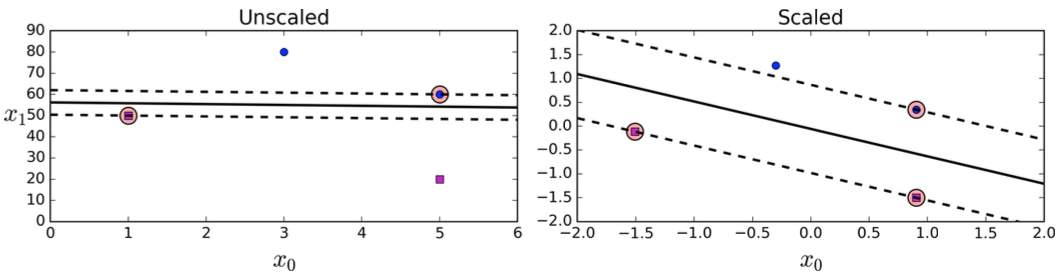

Reference: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron Published by O'Reilly Media, Inc., 2017 

# Soft Margin X Hard Margin Classification

A smaller C value leads to a wider street but more margin violations


![http://imageshack.com/a/img921/722/LHCAjB.png](http://imageshack.com/a/img921/722/LHCAjB.png)

Reference: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron Published by O'Reilly Media, Inc., 2017 

# Soft Margin X Hard Margin Classification

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=10, loss="hinge")),
    ])

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Decision Boundary for linear classifier

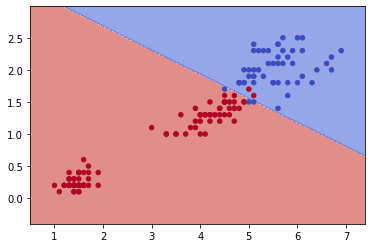

In [7]:
plot_decision_boundary(lambda x: svm_clf.predict(x))

# Nonlinear SVM Classification

* Most datasets are note linealy separable 

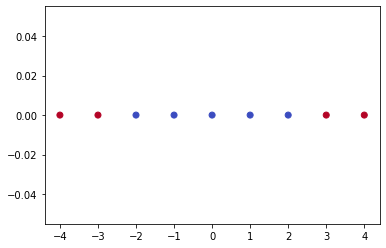

In [4]:
X = np.linspace(-4, 4, 9)    # Parameter1
y = [0 for x in X]           # Parameter1 relative constant
kind = [0, 0, 1, 1, 1, 1, 1, 0, 0] # labels

plt.scatter(X, y, c=kind, cmap=plt.cm.coolwarm_r) # plot graph

# Nonlinear SVM Classification

if you add a second feature $x_2 = (x_1)^2$

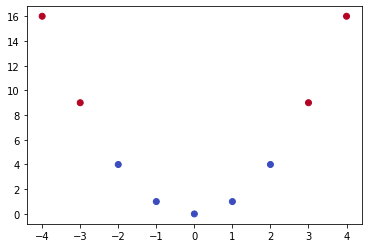

In [5]:
X = np.linspace(-4, 4, 9)             # Parameter1
y = [x**2 for x in X]                 # Parameter1 relative new parameter

kind = [0, 0, 1, 1, 1, 1, 1, 0, 0]    # same labels

plt.scatter(X, y, c=kind, cmap=plt.cm.coolwarm_r)

# Nonlinear SVM Classification

* if you add a second feature $x_2 = (x_1)^2$
* Nota a line with a perfect separation beteween classes

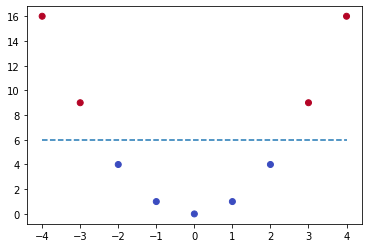

In [6]:
X = np.linspace(-4, 4, 9)             # Parameter1
y = [x**2 for x in X]                 # Parameter1 relative new parameter
kind = [0, 0, 1, 1, 1, 1, 1, 0, 0]    # same labels
plt.scatter(X, y, c=kind, cmap=plt.cm.coolwarm_r)
plt.plot([-4, 4], [6, 6], '--')         # Separation line 

# Implementing an SVM

* To implement this idea using `Scikit-Learn`, you can create a Pipeline containing a `PolynomialFeatures` transformer
* It is followed by a `StandardScaler` and a `LinearSVC`
* Let’s test this on the moons dataset

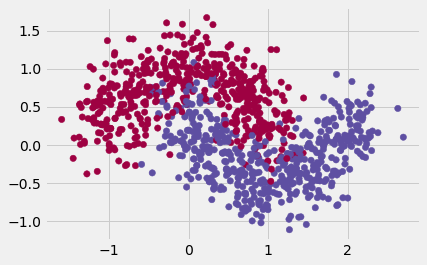

In [33]:
from sklearn.datasets import make_moons

np.random.seed(10)
X, y = make_moons(1000, noise=0.25)
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)

# Fit a classification model

In [34]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

/Users/brunosilva/Dropbox/Mackenzie/Aulas/venv_mackenzie/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

# Pollnomial Model

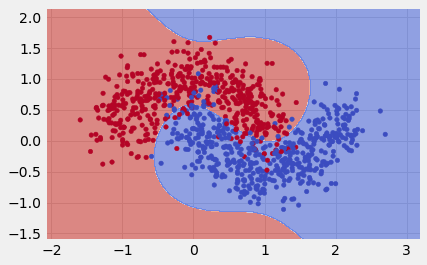

In [35]:
plot_decision_boundary(lambda x: polynomial_svm_clf.predict(x))

# Wich Kernel Complexity Should We Choose

 * Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs)
 * A low polynomial degree it cannot deal with very complex datasets (check previous example)
 * A high polynomial degree it creates a huge number of features, making the model too slow.

 # When using SVMs you can apply an almost miraculous mathematical technique called the kernel trick
 
 * It makes it possible to get the same result as if you added many polynomial features
 * without actually having to add them
 * So there is no combinatorial explosion of the number of features
 * This trick is implemented by the SVC class
 * Let’s test it on the moons dataset

# Check the code

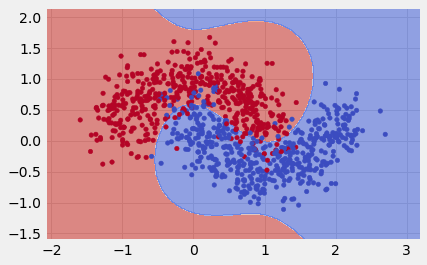

In [36]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

plot_decision_boundary(lambda x: poly_kernel_svm_clf.predict(x))

# What if we increase the polynomial order

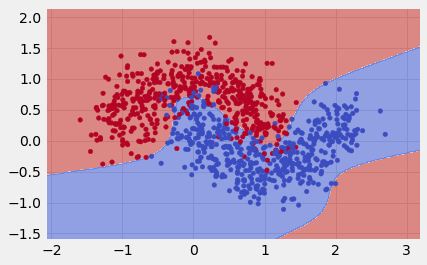

In [37]:
# As you increase polynomial order, it takes more time

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=7, coef0=10, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

plot_decision_boundary(lambda x: poly_kernel_svm_clf.predict(x))

#  TIP


* A common approach to find the right hyperparameter values is to use grid search.
* It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. 
* Having a good sense of what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.


# Gaussian Distribution

\\(f(x)=\frac{1}{\sigma \sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}\\)

Where
* $\mu$ - Mean Value
* $\sigma$ - Standard Deviation

# Gaussian Plot

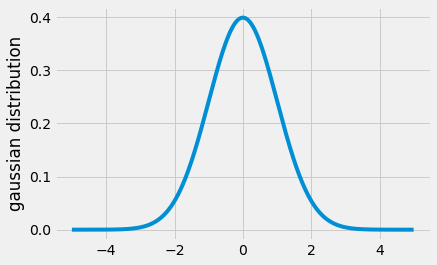

In [38]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0; std = 1; 
######################3
variance = np.square(std)
x = np.arange(-5,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()


# Adding Similarity Features

* Another technique to tackle nonlinear problems is to add features computed using a *similarity function*
* It measures how much each instance resembles a particular landmark
* Gaussian RBF (Radial Basis Function)
    * \\(\phi_{\gamma}(\mathbf{x}, \ell)=\exp \left(-\gamma\|\mathbf{x}-\ell\|^{2}\right)\\)
* For example, let’s take the one-dimensional dataset discussed earlier and add two landmarks to it at $x_1 = –2$ and $x_1 = 1$ (with $\gamma=0.3$)
* $x_{2}=\exp \left(-0.3 \times 1^{2}\right) \approx 0.74$ and $x_{3}=\exp \left(-0.3 \times 2^{2}\right) \approx 0.30$


# Adding Similarity Features

![http://imageshack.com/a/img922/3347/l78MmC.png](http://imageshack.com/a/img922/3347/l78MmC.png)

Reference: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron Published by O'Reilly Media, Inc., 2017 

# RBF Kernel

In [52]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=1))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

# RBF Kernel

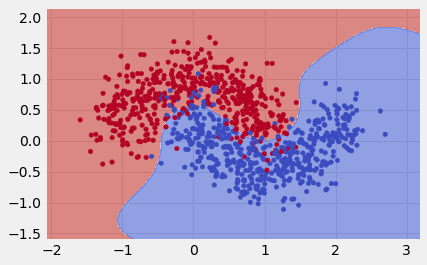

In [54]:
plot_decision_boundary(lambda x: rbf_kernel_svm_clf.predict(x))

# How to choose landmarks

*  The simplest approach is to create a landmark at the location of each and every instance in the dataset.
* This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable
* The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features)
* If your training set is very large, you end up with an equally large number of features.

# SVM Regression

* It also supports linear and nonlinear regression
* The trick is to reverse the objective:
    * Instead of trying to fit the largest possible street between two classes (while limiting margin violations)
    * SVM Regression tries to fit as many instances as possible on the street (while limiting margin violations)

# SVM Regression

![http://imageshack.com/a/img921/2373/e3PF1F.png](http://imageshack.com/a/img921/2373/e3PF1F.png)

Reference: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron Published by O'Reilly Media, Inc., 2017 

# Further Reading

* Support Vector Machine vs Logistic Regression https://medium.com/@george.drakos62/support-vector-machine-vs-logistic-regression-94cc2975433f
* Chapter 2 : SVM (Support Vector Machine) — Theory https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
* MIT Class: https://www.youtube.com/watch?v=_PwhiWxHK8o